# ***Importación de los datos y de las librerías principales:***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT9TAA8q_bAfHG7vT9oW760PL91XYUKMbJ1T9EqeVpls-MVgjiDl96UT3DEeH4wSXAn-t7c8w7O3dRG/pub?gid=320757224&single=true&output=csv'

data = pd.read_csv(url)
data.shape

(17737, 48)

#***Preparación de los datos previa a la implementación del algoritmo:***

***Verificamos dónde hay datos faltantes y los imputamos:***

In [5]:
### Verificar datos faltantes:
data.isna().sum()  # 'data.isna()' crea un DataFrame booleano del mismo tamaño que 'data',
                   # donde cada celda contiene True si el valor correspondiente es NaN (falta un dato),
                   # y False si no es NaN (es decir, si el dato está presente).

                   # '.sum()' se aplica al DataFrame booleano resultante y suma los valores True (NaN)
                   # en cada columna. Dado que True se interpreta como 1 y False como 0, el resultado
                   # es el número de valores faltantes (NaN) en cada columna del DataFrame 'data'.

,0
Name,0
OVR,0
PAC,0
SHO,0
PAS,0
DRI,0
DEF,0
PHY,0
Acceleration,0
Sprint Speed,0


In [6]:
#Imputar datos faltantes para las categorías de GK, cambiando NaN por 0:
gk_columns = ['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']
data[gk_columns] = data[gk_columns].fillna(0)

In [7]:
### Ahora extraeremos los datos:
X = data.iloc[:, 1:-1].values   # Extrae todas las filas y columnas desde la segunda hasta la penúltima para 'X'.
y = data.iloc[:, -1].values     # Extrae todas las filas de la última columna para 'y'.
y                               # Muestra el array de la variable objetivo 'y'.

array(['France', 'Spain', 'Norway', ..., 'United States', 'Switzerland',
       'Czech Republic'], dtype=object)

In [8]:
X

array([[91, 97, 90, ..., 0.0, 0.0, 'Right'],
       [91, 66, 80, ..., 0.0, 0.0, 'Right'],
       [91, 88, 92, ..., 0.0, 0.0, 'Left'],
       ...,
       [53, 60, 58, ..., 0.0, 0.0, 'Right'],
       [53, 61, 52, ..., 0.0, 0.0, 'Left'],
       [53, 60, 49, ..., 0.0, 0.0, 'Left']], dtype=object)

In [9]:
### Codificar el pie preferido como variable numérica
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
le = LabelEncoder()


# Codificar la penúltima columna (Preferred foot)
X[:, -2] = le.fit_transform(X[:, -2])

# Codificar la última columna (Nation)
X[:, -1] = le.fit_transform(X[:, -1])

# Verificar los resultados
print(X[:, -2:])  # Imprimir las últimas dos columnas para verificar la codificación

[[0 1]
 [0 1]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 0]]


In [10]:
# Convertir la matriz X en un DataFrame de pandas
df = pd.DataFrame(X)

# Iterar sobre todas las columnas del DataFrame
for col in df.columns:
    # Intentar convertir los valores de la columna a tipo numérico
    # Si algún valor no puede convertirse (por ejemplo, texto), se fuerza a NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convertir el DataFrame nuevamente a una matriz NumPy
X = df.values

# Mostrar la matriz X resultante
X

array([[91., 97., 90., ...,  0.,  0.,  1.],
       [91., 66., 80., ...,  0.,  0.,  1.],
       [91., 88., 92., ...,  0.,  0.,  0.],
       ...,
       [53., 60., 58., ...,  0.,  0.,  1.],
       [53., 61., 52., ...,  0.,  0.,  0.],
       [53., 60., 49., ...,  0.,  0.,  0.]])

In [12]:
from sklearn.impute import SimpleImputer  # Importar la clase SimpleImputer para manejar valores faltantes

# Crear una instancia de SimpleImputer para reemplazar los valores faltantes (NaN)
# 'missing_values=np.nan' indica que los valores faltantes son NaN
# 'strategy="median"' indica que los NaN serán reemplazados por la mediana de cada columna
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Ajustar el imputer a los datos en X, calculando la mediana de cada columna
imputer.fit(X)

# Transformar la matriz X, reemplazando los NaN por las medianas calculadas
X = imputer.transform(X)

# Mostrar la matriz X resultante con los valores faltantes reemplazados
X

array([[91., 97., 90., ...,  0.,  0.,  1.],
       [91., 66., 80., ...,  0.,  0.,  1.],
       [91., 88., 92., ...,  0.,  0.,  0.],
       ...,
       [53., 60., 58., ...,  0.,  0.,  1.],
       [53., 61., 52., ...,  0.,  0.,  0.],
       [53., 60., 49., ...,  0.,  0.,  0.]])

In [13]:
X_ = X[:,:-1]  #### Eligiendo todos los datos, excepto la nacionalidad
X_

array([[91., 97., 90., ...,  0.,  0.,  0.],
       [91., 66., 80., ...,  0.,  0.,  0.],
       [91., 88., 92., ...,  0.,  0.,  0.],
       ...,
       [53., 60., 58., ...,  0.,  0.,  0.],
       [53., 61., 52., ...,  0.,  0.,  0.],
       [53., 60., 49., ...,  0.,  0.,  0.]])

# ***K-means usando la distancia de Mahalanobis:***

***Método del codo:***

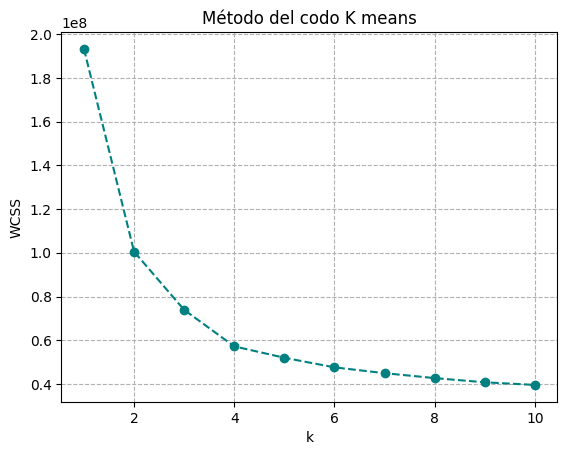

In [14]:
from sklearn.cluster import KMeans
## Inicializo donde almaceno el WCCS(k)
WCSS = []

for k in range(1,11):
  kpp = KMeans(n_clusters= k,
               #init = 'k-means++',
               random_state=42, n_init = 'auto')
  kpp.fit(X_)
  WCSS.append(kpp.inertia_)

plt.figure()
plt.plot(range(1,11), WCSS, 'o--', color = 'teal')
plt.title('Método del codo K means')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.grid(True)
plt.grid(linestyle = '--')
plt.show()

***Implementación del algoritmo:***

In [15]:
from scipy.spatial import distance
import random

# Cálculo de la matriz de covarianza de los datos transpuestos
cov = np.cov(X_.T)

# Inversión de la matriz de covarianza
cov_inv = np.linalg.inv(cov)

# Definición de la distancia de Mahalanobis
def distancia_mahalanobis(x, c):
    return distance.mahalanobis(x, c, cov_inv)

# Variables de inicialización
k = 4  # Número de clusters a utilizar
dimension = X_.shape[0]  # Cantidad de puntos en los datos
clusters_manuales_maha = np.zeros(dimension)  # Vector para almacenar asignaciones de clusters
distancias = np.zeros((dimension, k))  # Matriz para almacenar distancias entre puntos y centroides
centroids_maha = X_[random.sample(range(dimension), k)]  # Inicialización de centroides aleatorios
tol = 1e-6  # Tolerancia para la convergencia
error = 100  # Valor inicial de error alto para entrar al ciclo

# Repetir hasta que los centroides dejen de cambiar significativamente
while error > tol:
    # Asignación de cada punto al cluster más cercano
    for i in range(dimension):
        for j in range(k):
            distancias[i, j] = distancia_mahalanobis(X_[i], centroids_maha[j])  # Calcular distancia a cada centroide
        clusters_manuales_maha[i] = np.argmin(distancias[i])  # Asignar punto al cluster más cercano

    # Guardar los centroides previos antes de actualizarlos
    centroids_prev_maha = np.copy(centroids_maha)

    # Actualización de los centroides
    for l in range(k):
        puntos_cluster = X_[clusters_manuales_maha == l]  # Obtener puntos del cluster actual

        # Si el cluster no está vacío, recalcular el centroide
        if len(puntos_cluster) > 0:
            centroids_maha[l] = np.mean(puntos_cluster, axis=0)  # Nuevo centroide es el promedio
        else:
            # Si el cluster está vacío, reasignar el centroide a un punto aleatorio
            print(f"Cluster {l} vacío, reasignando centroide aleatoriamente")
            centroids_maha[l] = X_[np.random.choice(dimension)]

    # Calcular el error como el cambio promedio utilizando la distancia de Mahalanobis
    error = np.mean([distancia_mahalanobis(centroids_maha[l], centroids_prev_maha[l]) for l in range(k)])
    print(error)

5.080743595633734
0.8338428576228951
0.5230801445666101
0.41182104184587853
0.28071922308922287
0.15930425551662958
0.09870464025369555
0.09423256021911175
0.088678693478311
0.08501019588550808
0.06848786361497476
0.041283297975888346
0.049240081264925795
0.05871553998401516
0.05937132557142283
0.056960234166080495
0.05078228157772373
0.047520342065626296
0.04260909072621667
0.03413714488672075
0.027943184302351938
0.027553897322724164
0.02957250516050653
0.023181202796784088
0.014654005336810796
0.014110715167017871
0.015193247542618126
0.01567790243105391
0.015537938933828668
0.015070623223696095
0.01749064105276281
0.017688683281305767
0.02286539112903741
0.02546105147305428
0.030224810987876275
0.03172861058753206
0.03233535499658337
0.0349882304746534
0.028764185034718275
0.022570860970549333
0.018324348531435983
0.011688436278675756
0.009639879089863568
0.007637730194920346
0.005429035545800081
0.005683317670741438
0.00543091464384307
0.003969540738957491
0.0028695709272823057
0.

In [16]:
# Calcular la matriz de covarianza de los datos transpuestos y su inversa, usada para la distancia de Mahalanobis
cov = np.cov(X_.T)
cov_inv = np.linalg.inv(cov)

# Definir la función para calcular la distancia de Mahalanobis entre un punto x y un centroide c
def distancia_mahalanobis(x, c):
    return distance.mahalanobis(x, c, cov_inv)

# Inicialización de los centroides usando el método K-Means++
def inicializar_centroides_kmeans_pp(X_, k):
    # Selecciona el primer centroide de manera aleatoria
    centroids = []
    centroids.append(X_[np.random.choice(range(X_.shape[0]))])

    # Seleccionar los siguientes centroides
    for _ in range(1, k):
        # Calcular la distancia mínima de cada punto al centroide más cercano
        distancias_minimas = np.array([min([np.linalg.norm(x - c) for c in centroids]) for x in X_])

        # Calcular la probabilidad proporcional a las distancias al cuadrado para elegir el siguiente centroide
        prob_distancias = distancias_minimas ** 2
        prob_distancias /= prob_distancias.sum()  # Normalizar las probabilidades

        # Seleccionar el siguiente centroide basado en las probabilidades calculadas
        siguiente_centroide_idx = np.random.choice(range(X_.shape[0]), p=prob_distancias)
        centroids.append(X_[siguiente_centroide_idx])

    return np.array(centroids)

# Definir el número de clusters (k)
k = 4

# Dimensiones de los datos y variables iniciales
dimension = X_.shape[0]  # Número de puntos de datos
clusters_manuales_maha = np.zeros(dimension)  # Array para almacenar las asignaciones de los puntos a clusters
distancias = np.zeros((dimension, k))  # Matriz para almacenar las distancias de cada punto a los k centroides

# Inicializar los centroides usando K-Means++
centroids_maha = inicializar_centroides_kmeans_pp(X_, k)

# Definir la tolerancia (tol) y el error inicial alto para que entre al ciclo de iteración
tol = 1e-6
error = 100

# Iterar hasta que los centroides no cambien significativamente
while error > tol:
    # Asignar cada punto al cluster más cercano
    for i in range(dimension):
        for j in range(k):
            distancias[i, j] = distancia_mahalanobis(X_[i], centroids_maha[j])  # Calcular distancia de Mahalanobis
        clusters_manuales_maha[i] = np.argmin(distancias[i])  # Asignar el punto al cluster con menor distancia

    # Guardar los centroides previos antes de actualizarlos
    centroids_prev_maha = np.copy(centroids_maha)

    # Actualizar los centroides
    for l in range(k):
        puntos_cluster = X_[clusters_manuales_maha == l]  # Obtener los puntos asignados al cluster l

        # Si el cluster tiene puntos asignados, recalcular el centroide como la media
        if len(puntos_cluster) > 0:
            centroids_maha[l] = np.mean(puntos_cluster, axis=0)
        else:
            # Si el cluster está vacío, reasignar su centroide a un punto aleatorio
            print(f"Cluster {l} vacío, reasignando centroide aleatoriamente")
            centroids_maha[l] = X_[np.random.choice(dimension)]

    # Calcular el error como el cambio promedio en los centroides usando distancia euclidiana
    error = np.mean([np.linalg.norm(centroids_maha[l] - centroids_prev_maha[l]) for l in range(k)])
    print(f"Error: {error}")  # Imprimir el error actual

Error: 57.70362859433084
Error: 6.998750933014829
Error: 5.0827354945254175
Error: 4.72123809307449
Error: 3.7649835676238155
Error: 3.0772057928709593
Error: 2.917000181365652
Error: 2.6912695053009297
Error: 2.460919570430981
Error: 2.0311156901474803
Error: 1.788721127492157
Error: 2.2563479194125096
Error: 2.8111252116303858
Error: 2.4419131490719836
Error: 1.6140541514669493
Error: 1.7039313180084015
Error: 1.9293798551870234
Error: 1.947647461239733
Error: 1.492334754120876
Error: 0.930853270427511
Error: 0.5426851630096137
Error: 0.3604246232968153
Error: 0.2974785445746137
Error: 0.2111425658717369
Error: 0.14484077845186763
Error: 0.09172499807455342
Error: 0.06283740658786421
Error: 0.03337685581020158
Error: 0.024373337163226455
Error: 0.02331925288076869
Error: 0.02344222439509243
Error: 0.016015052577970926
Error: 0.02370686232892627
Error: 0.0044536002405974415
Error: 0.0


In [17]:
clusters_manuales_maha = clusters_manuales_maha.astype(int)
# Convierte el array de asignaciones de clusters a tipo entero, asegurando que las asignaciones son representadas correctamente
#como índices enteros para cada cluster (0, 1, 2, ...), lo cual es esencial para evitar confusiones
#en análisis posteriores o visualizaciones.

# ***Definición de funciones para la visualización:***

In [18]:
from sklearn.decomposition import PCA
# Crear un objeto PCA y ajustar los datos:
pca = PCA(n_components = 3)  # Queremos las tres primeras componentes principales
X_pca = pca.fit_transform(X_)   #Aplica el método de reducción de dimensionalidad PCA (Análisis de Componentes Principales) a los datos X_,
                                #ajustando el modelo PCA a los datos y transformándolos en un nuevo espacio de características,
                                #donde las dimensiones se reducen y se preserva la varianza máxima.

In [19]:
varianza = pca.explained_variance_ratio_
print(sum(varianza))

0.8339805362166829


In [20]:
X_pca

# Al ejecutar X_pca, se imprimirá el contenido de la variable, que es un array de NumPy que contiene
# los datos de entrada X_ transformados en un nuevo espacio de características con dimensiones reducidas.
# Si originalmente X_ tenía n dimensiones, X_pca tendrá menos dimensiones, definidas por el número
# de componentes principales seleccionados al aplicar PCA.
# Las nuevas dimensiones (componentes principales) están ordenadas según la cantidad de varianza
# que capturan de los datos originales, donde el primer componente principal captura la mayor
# parte de la varianza, seguido del segundo, y así sucesivamente.
#
# X_pca tendrá una forma de (m, k), donde m es el número de muestras en X_ y k es el número
# de componentes principales especificados al inicializar el objeto PCA.
# Por ejemplo, si X_ tiene 100 muestras y 10 características y se reduce a 2 componentes,
# entonces X_pca tendrá la forma (100, 2). La salida al imprimir X_pca se verá similar a:
# array([[ 1.23, -0.45],
#        [ 0.67,  2.34],
#        [-1.56,  1.23],
#        ...
#        [ 0.89, -1.00]])

array([[-113.70104076, -103.85990941,   42.02190541],
       [-134.4864478 ,   18.0149383 ,   91.26583116],
       [-105.08959035,  -76.82686449,   45.46505915],
       ...,
       [  -9.24864183,  -14.47142222,  -15.9108812 ],
       [   9.61554036,   14.10159251,  -27.76858086],
       [  21.38548966,  -37.22403765,  -43.43838496]])

In [22]:
print(X_.shape)
print(X_pca.shape)

(17737, 44)
(17737, 3)


In [42]:
def graficar_clusters_PCA2D(clusters, metodo, centroids):
    # Crear un gráfico de dispersión 2D utilizando las dos primeras componentes principales
    plt.figure(figsize=(10, 6))  # Establece el tamaño de la figura para el gráfico

    # Generar un gráfico de dispersión de los puntos transformados por PCA
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],  # Usar las dos primeras componentes principales para los ejes x e y
                    hue=clusters,  # Colorea los puntos según sus asignaciones de cluster
                    palette='viridis',  # Define la paleta de colores para los clusters
                    alpha=0.6,  # Ajusta la transparencia de los puntos (0 = transparente, 1 = opaco)
                    s=100)  # Define el tamaño de los puntos en el gráfico

    # Superponer los centroides en el gráfico
    plt.scatter(centroids[:, 0], centroids[:, 1],  # Usa las coordenadas de los centroides para el gráfico
                c='black',  # Color negro para los centroides
                s=100,  # Tamaño de los centroides en el gráfico
                label='centroides')  # Etiqueta para la leyenda de centroides

    # Configurar el título del gráfico
    plt.title(f'Visualización 2D de la Clusterización (PCA) {metodo}', fontsize=16)  # Título que incluye el método de clusterización

    # Etiquetas de los ejes
    plt.xlabel('Componente Principal 1')  # Etiqueta del eje x
    plt.ylabel('Componente Principal 2')  # Etiqueta del eje y

    plt.grid(True)  # Activa la cuadrícula en el gráfico
    plt.grid(linestyle='-', alpha=0.5)  # Configura el estilo y la transparencia de la cuadrícula

    plt.legend(title='Cluster')  # Añade la leyenda con el título 'Cluster'
    plt.show()  # Muestra el gráfico

In [38]:
from mpl_toolkits.mplot3d import Axes3D  # Importa las herramientas necesarias para gráficos 3D
import matplotlib.pyplot as plt  # Importa la biblioteca de gráficos matplotlib
import seaborn as sns  # Importa la biblioteca seaborn para gráficos más atractivos

def graficar_clusters_PCA3D(clusters, metodo):
    # Crear un gráfico 3D
    fig = plt.figure(figsize=(15, 9))  # Establece el tamaño de la figura para el gráfico 3D
    ax = fig.add_subplot(111, projection='3d')  # Añade un subplot con proyección 3D

    # Graficar los puntos en 3D con borde blanco
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],  # Usar las tres primeras componentes principales para los ejes
                         c=clusters,  # Colorea los puntos según sus asignaciones de cluster
                         cmap='viridis',  # Define la paleta de colores para los clusters
                         s=100,  # Define el tamaño de los puntos en el gráfico
                         edgecolor='white',  # Establece el color del borde de los puntos como blanco
                         alpha=0.6)  # Ajusta la transparencia de los puntos (0 = transparente, 1 = opaco)

    # Etiquetas de los ejes y título
    ax.set_title(f'Visualización 3D de la Clusterización (PCA) {metodo}', fontsize=16)  # Título que incluye el método de clusterización
    ax.set_xlabel('Componente Principal 1')  # Etiqueta del eje x
    ax.set_ylabel('Componente Principal 2')  # Etiqueta del eje y
    ax.set_zlabel('Componente Principal 3')  # Etiqueta del eje z

    # Añadir la leyenda
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")  # Crea una leyenda basada en los elementos de la dispersión
    ax.add_artist(legend1)  # Añade la leyenda al gráfico

    # Mostrar el gráfico
    plt.show()  # Muestra el gráfico 3D

# ***Visualización de la clusterización:***

In [24]:
centroids_maha = np.array(centroids_maha)
centroids_maha = pca.transform(centroids_maha)

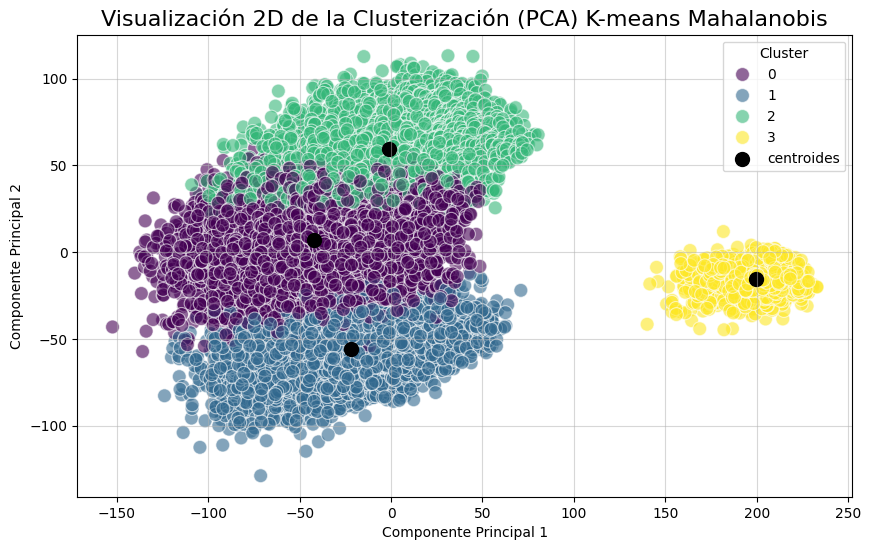

In [43]:
maha_2D = graficar_clusters_PCA2D(clusters_manuales_maha, 'K-means Mahalanobis', centroids_maha)
maha_2D

In [26]:
# Utilizar np.unique para obtener los clusters únicos y sus recuentos
# clusters_manuales_maha: un array que contiene las asignaciones de cluster para cada punto
# return_counts=True: devuelve también la cantidad de ocurrencias de cada cluster
unicos, recuentos = np.unique(clusters_manuales_maha, return_counts=True)

# 'unicos' contendrá los valores únicos de los clusters presentes en clusters_manuales_maha
# 'recuentos' contendrá la cantidad de puntos asignados a cada cluster correspondiente a los valores en 'unicos'

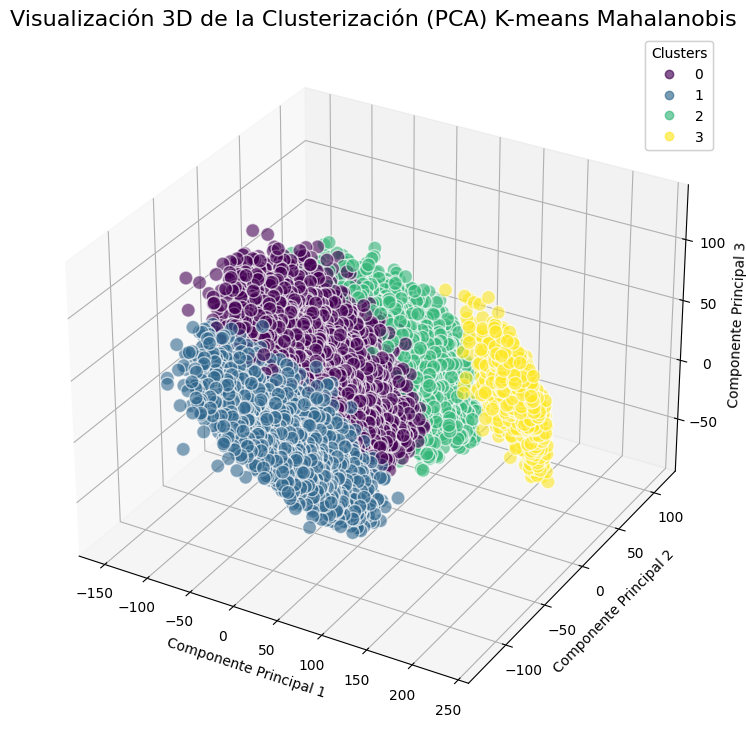

In [41]:
maha_3D = graficar_clusters_PCA3D(clusters_manuales_maha, 'K-means Mahalanobis')
maha_3D